# Gestion et Analyse de MdP

In [2]:
import pandas as pd
import numpy as np
import random as rd

##### Nettoyage du dataset

dataFrame : rockyou.txt
- Supprimer les doublons
- Supprimer les espaces en début et fin de caractère
- Supprimer les caractères indésirables
- Limite de 6 à 128 caractère dans les MdP
- Supprimer les MdP manquants
- Limite de caractère valide
- Suppression de MdP triviaux


In [3]:
#Chargement du dataset

file_path = r'C:\Users\kajan\vscode\ProjetM1Python\rockyou.txt'

#Pour avoir les 10000 premieres lignes
df = pd.read_csv(file_path,
                 on_bad_lines='skip',
                 encoding='latin-1',
                 nrows=10000)



#Pour les 10000 lignes aléatoires

#Nombre de ligne dans le fichier
n = sum(1 for line in open(file_path, encoding='latin-1'))
#Nombre de lignes désirees
s = 10000

skip = sorted(rd.sample(range(n), n-s))
df2 = pd.read_csv(file_path,
                  on_bad_lines='skip',
                  encoding="latin-1",
                  skiprows= skip)

print(df)
print(df2)

         123456
0         12345
1     123456789
2      password
3      iloveyou
4      princess
...         ...
9995     labeba
9996      kupal
9997  kittykat1
9998     killah
9999     kenjie

[10000 rows x 1 columns]
                 eddie
0                zxcvb
1            sarahjane
2               ceejay
3            sweetbaby
4            panthers1
...                ...
9981          #1action
9982            #1$tax
9983  princessmary1985
9984        !whatever!
9985         !(*&4life

[9986 rows x 1 columns]


In [5]:
#Définir un nom de colonne
df.columns = ["password"]

#Suppresion des doublons
df_clean = df.drop_duplicates()

#Supprimer les espaces en début et fin de chaine
df_clean.loc[:,'password'] = df_clean['password'].str.strip()

#Remplacer les NaN par chaine vide --> Non intérésant, supprime tout les caractère spéciaux
#df2_clean.loc[:,'password'] = df2_clean['password'].str.replace(r'[^\w\s]', '', regex=True)

#Filtrer les mdp de moins de 6 et au plus de 128 caractere
df_clean = df_clean[df_clean['password'].str.len().between(6,128)]

# Supprimer les mots de passe manquants
df_clean = df_clean.dropna( subset=['password'])

#Filtrer les caracter non autorisés
invalides_chars = df_clean['password'].str.contains(r'[^a-zA-Z0-9!@#$%^&*()]')
df_clean = df_clean[~invalides_chars]

#Supprimer les mots de passe commun
common_pwd = ['123456','password','admin','123456789', '1234567', '12345678']
df_clean = df_clean[~df_clean['password'].isin(common_pwd)]

df_clean = df_clean.reset_index(drop=True)

#Afficher résultat
print(df_clean)

       password
0      iloveyou
1      princess
2       rockyou
3        abc123
4        nicole
...         ...
9169    leandra
9170     labeba
9171  kittykat1
9172     killah
9173     kenjie

[9174 rows x 1 columns]


In [6]:
#Définir un nom de colonne
df2.columns = ["password"]

#Suppresion des doublons
df2_clean = df2.drop_duplicates()

#Supprimer les espaces en début et fin de chaine
df2_clean.loc[:,'password'] = df2_clean['password'].str.strip()

#Filtrer les mdp de moins de 6 et au plus de 128 caractere
df2_clean = df2_clean[df2_clean['password'].str.len().between(6,128)]

# Supprimer les mots de passe manquants
df2_clean = df2_clean.dropna( subset=['password'])

#Filtrer les caracter non autorisés
invalides_chars = df2_clean['password'].str.contains(r'[^a-zA-Z0-9!@#$%^&*()]')
df2_clean = df2_clean[~invalides_chars]

#Supprimer les mots de passe commun
common_pwd = ['123456','password','admin','123456789', '1234567', '12345678']
df2_clean = df2_clean[~df2_clean['password'].isin(common_pwd)]

df2_clean = df2_clean.reset_index(drop=True)

#Afficher résultat
print(df2_clean)

              password
0            sarahjane
1               ceejay
2            sweetbaby
3            panthers1
4            tangerine
...                ...
9342          #1action
9343            #1$tax
9344  princessmary1985
9345        !whatever!
9346         !(*&4life

[9347 rows x 1 columns]


##### Fonction Count

In [7]:
def count_uppercase(pwd) :
    c = 0
    for char in pwd :
        if char.isupper() :
            c += 1
    return c

def count_lowercase(pwd) :
    c = 0
    for char in pwd :
        if char.islower() :
            c += 1
    return c

def count_digit(pwd) :
    c = 0
    for char in pwd :
        if char.isdigit() :
            c += 1
    return c

def count_special_char(pwd) :
    return len(pwd) - ( count_digit(pwd) + 
                       count_lowercase(pwd) + 
                       count_uppercase(pwd) )
    


In [8]:
print(df_clean['password'][1569])
print(df_clean['password'][3])
print(len(df_clean['password'][1569]))
print(count_uppercase(df_clean['password'][1569]))
print(count_lowercase(df_clean['password'][1569]))
print(count_digit(df_clean['password'][1569]))
print(count_digit(df_clean['password'][0]))

myangel
abc123
7
0
7
0
0


In [ ]:
print(df_clean['password'][13696871])
print(df_clean['password'][13696873])
print(count_special_char(df_clean['password'][13696871]))
print(count_special_char(df_clean['password'][13696873]))

##### Modèle Supervisé

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [9]:
def def_strength(len, upper, lower, digit, spe):
    s = 0
    if len >= 6 :
        s += 1
    elif len >= 10 :
        s += 2
    if digit >= 1 :
        s += 1
    if spe >= 1 :
        s += 1
    if upper >= 1 :
        s += 1
    return s

In [10]:
def extract_features(password) : 
    length = len(password)
    upper = count_uppercase(password)
    lower = count_lowercase(password)
    digit = count_digit(password)
    spe = count_special_char(password)
    strength = def_strength(length, upper, lower, digit, spe)
    return [password, length, upper, lower, digit, spe, strength]

In [11]:
f = np.array([extract_features(pw) for pw in df_clean['password']])
dff = pd.DataFrame(f, columns=['password', 'length', 'upper', 'lower', 'digit', 'spe', 'strength'])

In [12]:
f2 = np.array([extract_features(pw) for pw in df2_clean['password']])
dff2 = pd.DataFrame(f2, columns=['password', 'length', 'upper', 'lower', 'digit', 'spe', 'strength'])

In [13]:
print(dff)
print(dff2)

       password length upper lower digit spe strength
0      iloveyou      8     0     8     0   0        1
1      princess      8     0     8     0   0        1
2       rockyou      7     0     7     0   0        1
3        abc123      6     0     3     3   0        2
4        nicole      6     0     6     0   0        1
...         ...    ...   ...   ...   ...  ..      ...
9169    leandra      7     0     7     0   0        1
9170     labeba      6     0     6     0   0        1
9171  kittykat1      9     0     8     1   0        2
9172     killah      6     0     6     0   0        1
9173     kenjie      6     0     6     0   0        1

[9174 rows x 7 columns]
              password length upper lower digit spe strength
0            sarahjane      9     0     9     0   0        1
1               ceejay      6     0     6     0   0        1
2            sweetbaby      9     0     9     0   0        1
3            panthers1      9     0     8     1   0        2
4            tangerine

In [14]:
# Split into features and labels
X = dff[['length', 'upper', 'lower', 'digit', 'spe']].values
y = dff['strength'].values

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# Make predictions and evaluate the model
y_pred = knn.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 1.00


<Axes: >

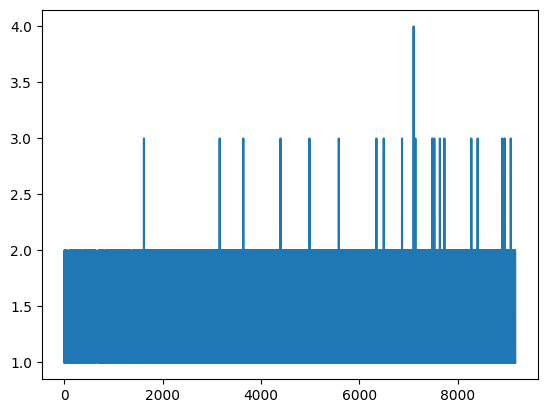

In [22]:
plt.figure()
dff['strength'].astype(int).plot()

In [17]:
# Split into features and labels
X2 = dff2[['length', 'upper', 'lower', 'digit', 'spe']].values
y2 = dff2['strength'].values

# Train/test split
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X2_train_scaled = scaler.fit_transform(X2_train)
X2_test_scaled = scaler.transform(X2_test)

# Initialize and train the KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X2_train_scaled, y2_train)

# Make predictions and evaluate the model
y2_pred = knn.predict(X2_test_scaled)
accuracy = accuracy_score(y2_test, y2_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.99


<Axes: >

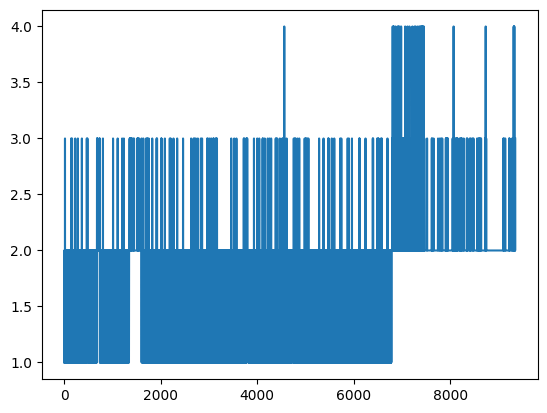

In [23]:
plt.figure()
dff2['strength'].astype(int).plot()

<Axes: >

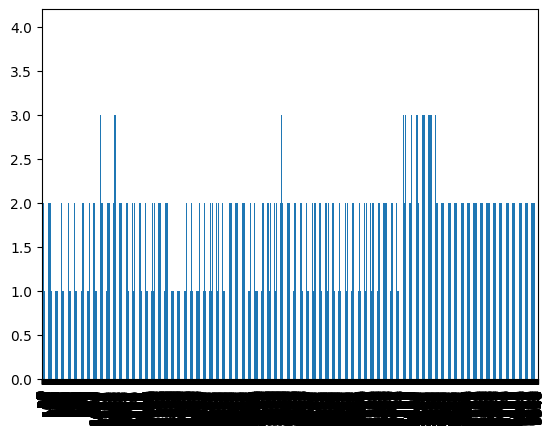

In [24]:
plt.figure()
dff2['strength'].astype(int).plot.bar()

In [33]:
plt.figure()
dff2.reset_index().astype(int).plot.scatter(x="strength", y="index")

ValueError: invalid literal for int() with base 10: 'sarahjane'

<Figure size 640x480 with 0 Axes>

In [32]:
dff2.reset_index()

,index,password,length,upper,lower,digit,spe,strength
0,0,sarahjane,9,0,9,0,0,1
1,1,ceejay,6,0,6,0,0,1
2,2,sweetbaby,9,0,9,0,0,1
3,3,panthers1,9,0,8,1,0,2
4,4,tangerine,9,0,9,0,0,1
...,...,...,...,...,...,...,...,...
9342,9342,#1action,8,0,6,1,1,3
9343,9343,#1$tax,6,0,3,1,2,3
9344,9344,princessmary1985,16,0,12,4,0,2
9345,9345,!whatever!,10,0,8,0,2,2


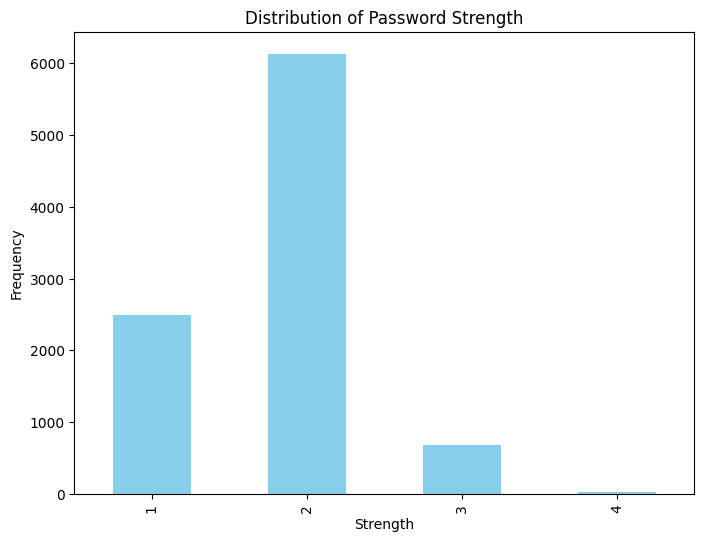

In [34]:
plt.figure(figsize=(8, 6))
dff2['strength'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Distribution of Password Strength')
plt.xlabel('Strength')
plt.ylabel('Frequency')
plt.show()

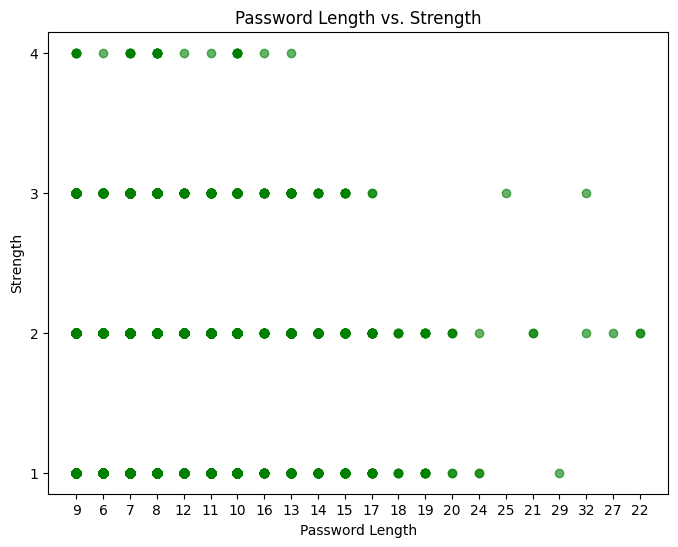

In [35]:
# Scatter plot to show the relationship between length and strength
plt.figure(figsize=(8, 6))
plt.scatter(dff2['length'], dff2['strength'], c='green', alpha=0.6)
plt.title('Password Length vs. Strength')
plt.xlabel('Password Length')
plt.ylabel('Strength')
plt.show()

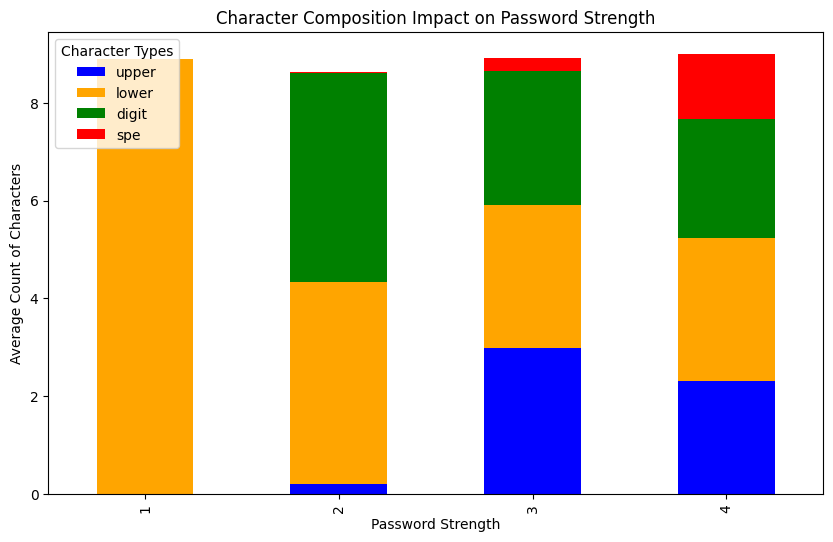

In [40]:
# Prepare data for a stacked bar chart
dff2_grouped = dff2.groupby('strength').mean(numeric_only='true')[['upper', 'lower', 'digit', 'spe']]

# Plot the stacked bar chart
dff2_grouped.plot(kind='bar', stacked=True, figsize=(10, 6), color=['blue', 'orange', 'green', 'red'])
plt.title('Character Composition Impact on Password Strength')
plt.xlabel('Password Strength')
plt.ylabel('Average Count of Characters')
plt.legend(title='Character Types', loc='upper left')
plt.show()
